# LOAD PACKAGES FOR PROJECT

In [1]:
from bs4 import BeautifulSoup as Soup
import bs4
import pandas as pd
import import_ipynb
import numpy as np
import requests
from datetime import datetime
import url_file
from datetime import timedelta

importing Jupyter notebook from url_file.ipynb


# HOUSE PRICE DATA EXTRACTION :
## DATA WAS SCRAPED FROM :" - Website link details embeded in url_file for privacy

In [2]:
def preview():
    for i in range(0,1):
      url=url_file.url
      r=requests.get(url).text
      soup=Soup(r,'html.parser')
      return soup.prettify()

preview()

'<!DOCTYPE html>\n<html lang="en">\n <head>\n  <title>\n   Houses For Sale  in Nigeria | Private Property\n  </title>\n  <!-- Required meta tags -->\n  <meta charset="utf-8"/>\n  <meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>\n  <link href="/assets/static/eee77358ca998bedeadb567a2f4cffab-favicon.png" rel="icon" type="image/ico"/>\n  <meta content="index, follow" name="robots"/>\n  <link href="https://www.privateproperty.com.ng/houses-for-sale?page=" rel="canonical"/>\n  <link href="https://www.privateproperty.com.ng/houses-for-sale?page=" hreflang="en" rel="alternate"/>\n  <meta content="Find Houses For Sale  with PrivateProperty.com.ng. Browse the Nigeria\'s largest property database and find Houses For Sale  from the leading estate agents in Nigeria" name="description"/>\n  <meta content="Houses For Sale  in Nigeria" property="og:title"/>\n  <meta content="Find Houses For Sale  with PrivateProperty.com.ng. Browse the Nigeria\'s largest propert

In [3]:
image_url=[]
Description=[]
Address=[]
Date=[]
Price=[]
Bedroom=[]
Bathroom=[]
Toilet=[]
for i in range(0,800):
    url=url_file.url+str(i)
    r=requests.get(url).text
    soup=Soup(r,'html.parser')
    wal=soup.find('div',{'class':'result-listings'})
    for info in wal.find_all('div',{'class':'similar-listings-info'}):
         description=info.find('h2')
         Description.append(description.text)
         address=info.find('p',{'class':'listings-location'})
         Address.append(address.text)
         date=info.find('div',{'class':'media'}).find('div',{'class':'media-body'}).find('h5',{'class':'mt-0'})
         Date.append(date.text)
    for info2 in wal.find_all('div',{'class':'similar-listings-price'}):
         price=info2.find('h4')
         Price.append(price.text)
         rooms=info2.find_all('ul',{'class':'property-benefit'})
         for room in rooms:
            col=room.find_all('li')
            bedroom=col[0].text
            bathroom=col[1].text
            toilet=col[2].text
            Bedroom.append(bedroom)
            Bathroom.append(bathroom)
            Toilet.append(toilet)

## DATA COLLECTION & DATA CLEANING
STORED IN A DICTIONARY CONVERTED TO DATAFRAME

In [4]:
property_dict={"description":Description,
               "Address":Address,"Date":Date,"Price":Price,"Bedroom":Bedroom,
              "Bathroom":Bathroom,"Toilet":Toilet}
df=pd.DataFrame(property_dict)

In [5]:
df[["date","cols"]]=df["Date"].str.split(',',expand=True)
df.drop(["Date","cols"],axis=1,inplace=True)

In [6]:
df.head()

,description,Address,Price,Bedroom,Bathroom,Toilet,date
0,2 Units Of 4 Bedrooms Fully Detached Duplex,\n\n\n Magodo Phase 2 Ikeja Lagos,"₦ 150,000,000",\n\n\n 4,\n\n\n 4,\n\n\n 4,Updated 19 Jun 2023
1,Smart 3bedroom Penthouse +bq For Sale At Cambe...,\n\n\n Freedom Way Lekki Phase 1 Lekki Phase 1...,"₦ 140,000,000/month",\n\n\n 3,\n\n\n 3,\n\n\n 3,Updated Today
2,Luxury 4 Bedroom Detached House On 535sqm Land...,\n\n\n Royal Gardens Estate* Ajah Lagos,"₦ 235,000,000",\n\n\n 4,\n\n\n 5,\n\n\n 5,Updated Today
3,Luxury 4 Bedroom Maisonette House* With Lovely...,\n\n\n Banana Island Estate* Ikoyi Lagos,"$ 1,241,000",\n\n\n 4,\n\n\n 6,\n\n\n 6,Updated Today
4,Structurally Sound 5 Bedroom Detached House On...,\n\n\n Lekki County Homes Estate Lekki Express...,"₦ 220,000,000",\n\n\n 5,\n\n\n 6,\n\n\n,Updated Today


In [7]:
df["date"]=df["date"].replace("Updated Today",datetime.now().strftime("%d %b %Y"))
df["date"]=df["date"].replace("Added Today",datetime.now().strftime("%d %b %Y"))
df["date"]=df["date"].replace("Updated Yesterday",(datetime.now()-timedelta(days = 1)).strftime("%d %b %Y"))
df["date"]=df["date"].replace({"Updated ":"","Added ":"","  ":""},regex=True)

In [8]:
df["Toilet"].replace({"\n":""," ":""},regex=True,inplace=True)
df["Bedroom"].replace({"\n":""," ":""},regex=True,inplace=True)
df["Bathroom"].replace({"\n":""," ":""},regex=True,inplace=True)
df["Price"].replace({"/sqm":"","/day":"","/month":"","/year":"",",":""," ":""},regex=True,inplace=True)
df["Address"].replace({"\n":""},regex=True,inplace=True)
df=df.replace('',0,regex = True)

In [9]:
df.head(4)

,description,Address,Price,Bedroom,Bathroom,Toilet,date
0,2 Units Of 4 Bedrooms Fully Detached Duplex,Magodo Phase 2 Ikeja Lagos,₦150000000,4,4,4,19 Jun 2023
1,Smart 3bedroom Penthouse +bq For Sale At Cambe...,Freedom Way Lekki Phase 1 Lekki Phase 1 Lekki...,₦140000000,3,3,3,25 Jun 2023
2,Luxury 4 Bedroom Detached House On 535sqm Land...,Royal Gardens Estate* Ajah Lagos,₦235000000,4,5,5,25 Jun 2023
3,Luxury 4 Bedroom Maisonette House* With Lovely...,Banana Island Estate* Ikoyi Lagos,$1241000,4,6,6,25 Jun 2023


In [10]:
df["Currency"]=df["Price"].str.slice(stop=1)
df["Price"].replace({"₦":"","$":"","$":""},regex=True,inplace=True)

In [11]:
df["Bedroom"]=df["Bedroom"].astype('int')
df["Bathroom"]=df["Bathroom"].astype('int')
df["Toilet"]=df["Toilet"].astype('int')
df["date"]=pd.to_datetime(df["date"])

In [12]:
df.dtypes

description            object
Address                object
Price                  object
Bedroom                 int32
Bathroom                int32
Toilet                  int32
date           datetime64[ns]
Currency               object
dtype: object

In [13]:
df.head()

,description,Address,Price,Bedroom,Bathroom,Toilet,date,Currency
0,2 Units Of 4 Bedrooms Fully Detached Duplex,Magodo Phase 2 Ikeja Lagos,150000000,4,4,4,2023-06-19,₦
1,Smart 3bedroom Penthouse +bq For Sale At Cambe...,Freedom Way Lekki Phase 1 Lekki Phase 1 Lekki...,140000000,3,3,3,2023-06-25,₦
2,Luxury 4 Bedroom Detached House On 535sqm Land...,Royal Gardens Estate* Ajah Lagos,235000000,4,5,5,2023-06-25,₦
3,Luxury 4 Bedroom Maisonette House* With Lovely...,Banana Island Estate* Ikoyi Lagos,$1241000,4,6,6,2023-06-25,$
4,Structurally Sound 5 Bedroom Detached House On...,Lekki County Homes Estate Lekki Expressway Le...,220000000,5,6,0,2023-06-25,₦


In [14]:
df.dtypes

description            object
Address                object
Price                  object
Bedroom                 int32
Bathroom                int32
Toilet                  int32
date           datetime64[ns]
Currency               object
dtype: object

In [17]:
df["date"]=pd.to_datetime(df["date"])
df["Price"]=df["Price"].astype('int')

In [18]:
df["State"]=df["Address"].str.split().str[-1]
df["State"]=df["State"].replace({"4":"Abuja","Area":"Enugu"})
df["Location"]=df["Address"].str.split().str[-2]

In [19]:
df.head(2)

,description,Address,Price,Bedroom,Bathroom,Toilet,date,Currency,State,Location
0,2 Units Of 4 Bedrooms Fully Detached Duplex,Magodo Phase 2 Ikeja Lagos,150000000,4,4,4,2023-06-19,₦,Lagos,Ikeja
1,Smart 3bedroom Penthouse +bq For Sale At Cambe...,Freedom Way Lekki Phase 1 Lekki Phase 1 Lekki...,140000000,3,3,3,2023-06-25,₦,Lagos,Lekki


In [20]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of                                           description   
0         2 Units Of 4 Bedrooms Fully Detached Duplex  \
1   Smart 3bedroom Penthouse +bq For Sale At Cambe...   
2   Luxury 4 Bedroom Detached House On 535sqm Land...   
3   Luxury 4 Bedroom Maisonette House* With Lovely...   
4   Structurally Sound 5 Bedroom Detached House On...   
..                                                ...   
61                    4 Bedroom Fully Detached Duplex   
62          Luxurious 4bed Semi Detached Duplex Wt Bq   
63  Luxury 5 Bedroom Semi Detached Duplex With Bq ...   
64  Super Luxury 5 Bedroom Fully Detached Duplex W...   
65                            Lovely And Spacious 4bd   

                                              Address      Price  Bedroom   
0                         Magodo Phase 2 Ikeja Lagos   150000000        4  \
1    Freedom Way Lekki Phase 1 Lekki Phase 1 Lekki...  140000000        3   
2                   Royal Gardens Estate*

In [21]:
df.describe(include="all")

,description,Address,Price,Bedroom,Bathroom,Toilet,date,Currency,State,Location
count,66,66,66,66.000000,66.000000,66.000000,66,66,66,66
unique,63,47,44,NaN,NaN,NaN,NaN,2,4,10
top,Lovely 4bedroom Terrace Duplex,Ologolo Lekki Lagos,65000000,NaN,NaN,NaN,NaN,₦,Lagos,Lekki
freq,2,6,5,NaN,NaN,NaN,NaN,64,63,45
mean,NaN,NaN,NaN,4.106061,3.803030,4.166667,2023-06-23 04:43:38.181818112,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,2023-06-19 00:00:00,NaN,NaN,NaN
25%,NaN,NaN,NaN,4.000000,4.000000,3.250000,2023-06-23 00:00:00,NaN,NaN,NaN
50%,NaN,NaN,NaN,4.000000,4.000000,5.000000,2023-06-23 00:00:00,NaN,NaN,NaN
75%,NaN,NaN,NaN,5.000000,5.000000,6.000000,2023-06-24 00:00:00,NaN,NaN,NaN
max,NaN,NaN,NaN,6.000000,7.000000,7.000000,2023-06-25 00:00:00,NaN,NaN,NaN


In [ ]:
df.to_csv("originalhousedata.csv")

#  The Price column was converted to naira and currency column was deleted.

In [22]:
df=pd.read_csv("originalhousedata.csv")

In [23]:
df.head()

,Unnamed: 0,description,Address,Price,Bedroom,Bathroom,Toilet,date,State,Location
0,0,Tastefully Finished 3 Bedroom Terrace,Chisco Ikate Ikate Elegushi Lekki Lagos,85000000,3,3,4,2023-05-27,Lagos,Lekki
1,1,3bedroom Terrace,Sangotedo Ajah Lagos,45000000,3,0,0,2023-05-29,Lagos,Ajah
2,2,4bedroom Top Notch,2nd Toll Gate Lekki Lekki Lagos,75000000,4,0,0,2023-05-29,Lagos,Lekki
3,3,Executive 4 Bedroom Fully Detached Duplex With...,Nicon Town Estate Lekki Lagos,250000000,4,4,5,2023-05-29,Lagos,Lekki
4,4,Magnificent Luxury 4 Bedroom Semi Detached Wit...,Agungi Lekki Lagos,130000000,4,4,5,2023-05-29,Lagos,Lekki


In [24]:
df.dtypes

Unnamed: 0      int64
description    object
Address        object
Price           int64
Bedroom         int64
Bathroom        int64
Toilet          int64
date           object
State          object
Location       object
dtype: object

In [25]:
df["date"]=pd.to_datetime(df["date"])
df.drop("Unnamed: 0", axis=1, inplace= True)

## EDA

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


             Price   Bedroom  Bathroom    Toilet
Price     1.000000  0.149178  0.116198  0.085401
Bedroom   0.149178  1.000000  0.661948  0.469075
Bathroom  0.116198  0.661948  1.000000  0.696184
Toilet    0.085401  0.469075  0.696184  1.000000


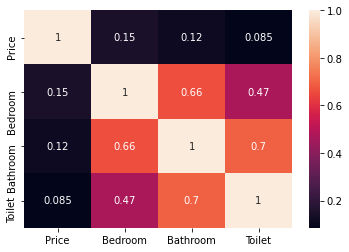

In [27]:
print(df[["Price","Bedroom","Bathroom","Toilet"]].corr())
dfplot= sns.heatmap(df[["Price","Bedroom","Bathroom","Toilet"]].corr(),annot=True)
plt.show()

In [28]:
df["State"].value_counts().to_frame()

,count
State,
Lagos,14750
Abuja,1546
Oyo,691
Ogun,221
Enugu,166
Rivers,71
Imo,58
Edo,18
Delta,18


# Average price per state

Text(0.5, 1.0, 'Average price per state ')

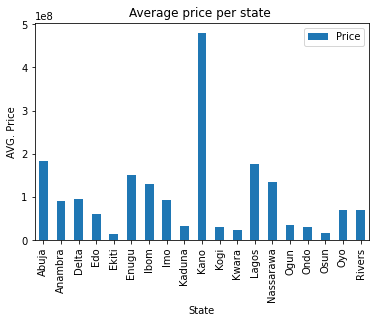

In [29]:
df1=df[["State","Price"]]
df1=df1.groupby(df1["State"]).mean().round(0)
df1.plot(kind='bar')
plt.ylabel("AVG. Price")
plt.title("Average price per state ")

# Maximum & minimum price per state (most expensive & least expensive houses prices per state)

In [30]:
df2=df[["State","Price"]].where(df["Price"]>=400000)
df2i=df2.groupby(df2["State"]).min()
df2ii=df2.groupby(df2["State"]).max()

                 Price
State                 
Lagos         420000.0
Oyo           450000.0
Ogun          590000.0
Abuja        1200000.0
Kogi         1500000.0
Rivers       1800000.0
Nassarawa    3500000.0
Kwara        3900000.0
Edo          6000000.0
Imo          8000000.0
Ekiti        9000000.0
Kaduna       9500000.0
Ibom        10000000.0
Ondo        10000000.0
Delta       12000000.0
Osun        12000000.0
Enugu       16000000.0
Anambra     70000000.0
Kano       480000000.0


<AxesSubplot:title={'center':'States with highest minimum price'}, xlabel='State', ylabel='Price(*10^8)'>

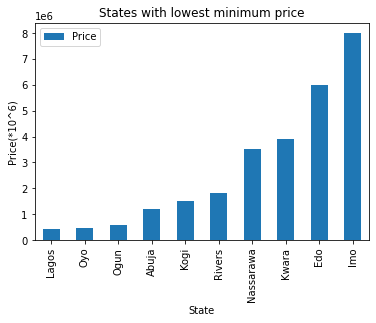

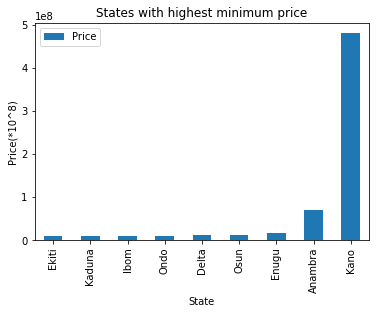

In [31]:
print(df2i.sort_values(by="Price"))
df2i.sort_values(by="Price")[:10].plot(kind="bar",ylabel="Price(*10^6)",title="States with lowest minimum price")
df2i.sort_values(by="Price")[10:].plot(kind="bar",ylabel="Price(*10^8)",title="States with highest minimum price")

                  Price
State                  
Ekiti      2.600000e+07
Osun       3.000000e+07
Kwara      5.500000e+07
Ondo       6.000000e+07
Kaduna     7.000000e+07
Kogi       9.500000e+07
Anambra    1.350000e+08
Edo        1.420000e+08
Rivers     2.600000e+08
Ibom       3.500000e+08
Ogun       3.600000e+08
Delta      4.500000e+08
Kano       4.800000e+08
Nassarawa  5.000000e+08
Imo        5.000000e+08
Oyo        8.000000e+08
Enugu      1.000000e+09
Abuja      2.000000e+09
Lagos      2.100000e+09


<AxesSubplot:title={'center':'States with highest maximum price'}, xlabel='State', ylabel='Price(*10^9)'>

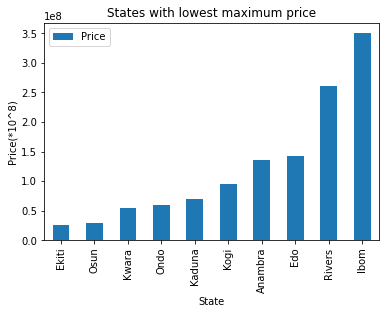

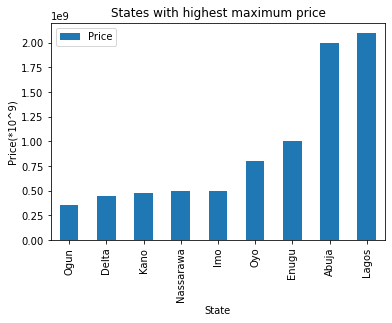

In [32]:
print(df2ii.sort_values(by="Price"))
df2ii.sort_values(by="Price")[:10].plot(kind="bar",ylabel="Price(*10^8)",title="States with lowest maximum price")
df2ii.sort_values(by="Price")[10:].plot(kind="bar",ylabel="Price(*10^9)",title="States with highest maximum price")

# Frequent house description

In [33]:
df["description"].value_counts()[:10]

description
4 Bedroom Semi Detached Duplex                163
4 Bedroom Terrace Duplex                      138
5 Bedroom Fully Detached Duplex                92
4 Bedroom Semi Detached Duplex With Bq         87
4bedroom Semi Detached Duplex With A Bq        72
Luxury 4 Bedroom Terrace Duplex                70
5 Bedroom Detached Duplex                      70
Newly Built 4 Bedroom Detached Duplex          56
Newly Built 4 Bedroom Semi Detached Duplex     52
4 Bedroom Fully Detached Duplex                52
Name: count, dtype: int64

<AxesSubplot:ylabel='description'>

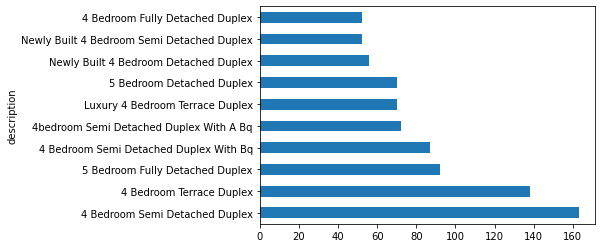

In [34]:
df["description"].value_counts()[:10].plot(kind="barh")

# Most expensive house description

In [35]:
df2=df[["description","Price"]]
df2=df2.groupby(df2["description"]).max()[:10].sort_values(by="Price",ascending=False)
df2

,Price
description,
(5) Bedroom Semi Detached Duplexes With Bq For Sale,230000000
Furnished 2 Bedroom Apartment,170000000
Tastefully Furnished And Finished 4 Bedroom,100000000
"#85m Well Appointed 5 Bedroom Duplex For Sale At Gra Lokoja 0,90,76,21,23,24",85000000
"*direct Sale* ♦️70% Completion Of 7bedrooms Duplex At Cherry Street, Ayegun Oleyo, Off Akala Express, Ibadan. *title: Building Plan, Red Copy Survey And Legal Agreement.* *price: 42m* *note:* It's A Semi Detached 3bedrooms Duplex And 2units Of 2bedroom Duplex.",42000000
*distress Direct Sale*70% Completion Of A Semi Detached 3bedrooms Duplex With 2units Of 2bedroom Duplex,42000000
*15 Bedrooms Detached Bungalow.*,40000000
*de Avocado Smart And* *luxury Homes 2.0 Abijo* *(inside Chois Garden* *estate)*,35000000
*for Sale In Ibadan* A Modern Standard Three《3》 Bedroom Bungalow With《 2》 Sitting Rooms,23000000


# Post per date in year 2023

<AxesSubplot:title={'center':'Sales posted per date'}, xlabel='date', ylabel='Number of posted sales'>

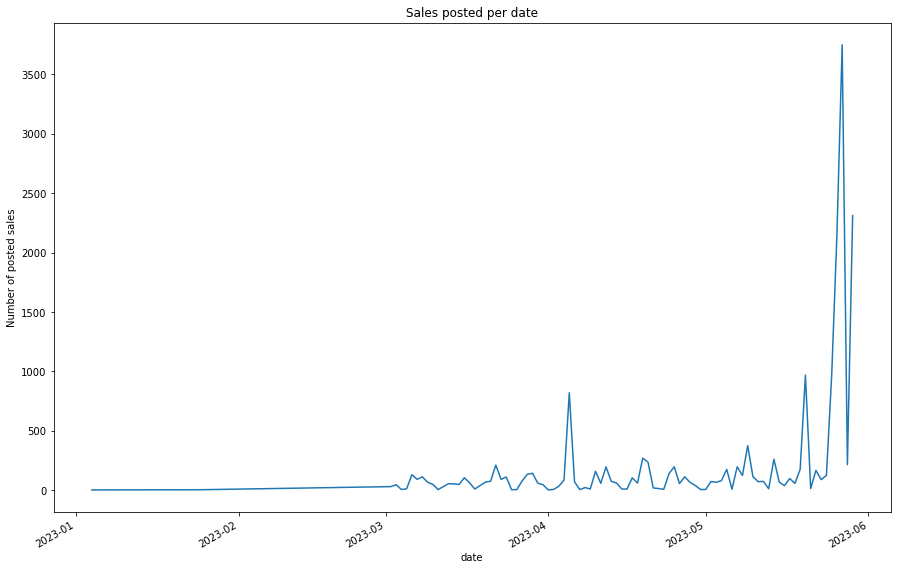

In [36]:
df["date"].where((df["date"].dt.year)==2023).value_counts().plot(kind="line",ylabel="Number of posted sales",
                                                                 title="Sales posted per date",figsize=(15,10))

# Unique Locations

In [37]:
df["Location"].value_counts()
location= list(df["Location"].unique())
unwanted=[1,2,3,4]
location=sorted(location, reverse = True)
del location[-4:]
location

['Yaba',
 'Surulere',
 'Road',
 'Phase',
 'Owerri',
 'Oshodi',
 'Mushin',
 'Lokoja',
 'Lekki',
 'Lafia',
 'Ketu',
 'Isolo',
 'Island',
 'Ilorin',
 'Ikoyi',
 'Ikeja',
 'Ibadan',
 'Harcourt',
 'Gbagada',
 'Festac',
 'Extension',
 'Express',
 'Enugu',
 'Benin',
 'Asaba',
 'Area',
 'Apapa',
 'Akwa',
 'Ajah',
 'Agege']